In [9]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)
x = 2 * rng.rand(50)
y = 2*(x**2) - x + 1 + rng.randn(50)



In [10]:
n=x.shape[0]
def lin(y1_pred, y):
    l = abs((y1_pred - y) ** 3)/2 
    lin = l.mean()
    return lin


In [12]:
def poly(y2_pred, y):
    l = abs((y2_pred - y) ** 7)/2 
    poly = l.mean()
    return poly

def pred1(x,m,c):
    return m*x+c
def pred2(x,b0,b1,b2):
    return b2*(x**2)+b1*x+b0

In [13]:
def gradient_descent1(x,y,m,c,learning_rate1,n):
   y1_pred=pred1(x,m,c)
   dm = (3.0/(2*n)) * np.sum(np.multiply(x,(y1_pred-y)**2))
   dc = (3.0/(2*n)) * np.sum((y1_pred-y)**2)
   m = m - learning_rate1 * dm
   c = c - learning_rate1 * dc
   return m,c
def gradient_descent2(x,y,b0,b1,b2,learning_rate2,n):
   y2_pred=pred2(x,b0,b1,b2)
   db2 = (7.0/(2*n)) * np.sum(np.multiply(x**2,(y2_pred-y)**6))
   db1 = (7.0/(2*n)) * np.sum(np.multiply(x,(y2_pred-y)**6))
   db0 = (7.0/(2*n)) * np.sum((y2_pred-y)**6)
   b2 = b2 - learning_rate2 * db2
   b1 = b1 - learning_rate2 * db1
   b0 = b0 - learning_rate2 * db0
   return b2,b1,b0

In [17]:

m = np.random.rand(1)
c = np.random.rand(1)

b2 = np.random.rand(1)
b1 = np.random.rand(1)
b0 = np.random.rand(1)

learning_rate1 = 0.000000001
learning_rate2 = 0.00000000001
num_epochs = 100000


In [18]:

L1=[]
for i in range(num_epochs):
    m, c = gradient_descent1(x,y,m,c,learning_rate1,n)
    y1_hat = hypothesis1(x,m,c)
    L1.append(cost1(y1_hat,y))
print(f"Obtained value of m: {m}")
print(f"Obtained value of c: {c}")
print(f"Obtained line: y={m}x+{c}")

L2=[]
for j in range(num_epochs):
    b2,b1,b0 = gradient_descent2(x,y,b0,b1,b2,learning_rate2,n)
    y2_hat = hypothesis2(x,b0,b1,b2)
    L2.append(cost2(y2_hat,y))
print(f"Obtained value of b2: {b2}")
print(f"Obtained value of b1: {b1}")
print(f"Obtained value of b0: {b0}")
print(f"Obtained polynomial: y={b2}x**2+{b1}x+{b0}")

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x.reshape(-1,1),y)
y_sklearn = regressor.predict(x.reshape(-1,1))

Obtained value of m: [0.51451931]
Obtained value of c: [0.95042134]
Obtained line: y=[0.51451931]x+[0.95042134]
Obtained value of b2: [0.67380217]
Obtained value of b1: [0.84851054]
Obtained value of b0: [0.99758827]
Obtained polynomial: y=[0.67380217]x**2+[0.84851054]x+[0.99758827]


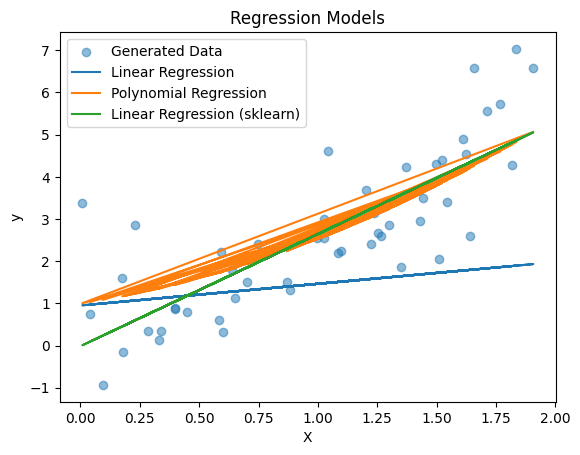

In [20]:


plt.scatter(x,y,alpha=0.5,label='Generated Data')
plt.plot(x,y1_hat,label='Linear Regression')
plt.plot(x,y2_hat,label='Polynomial Regression')
plt.plot(x, y_sklearn, label='Linear Regression (sklearn)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression Models')
plt.legend()
plt.show()